In [1]:
import pymysql

In [2]:
import jieba

In [3]:
import csv

In [4]:
from wordcloud import WordCloud

In [5]:
import matplotlib.pyplot as plt

In [6]:
from collections import Counter

In [7]:
db = pymysql.connect(host='localhost',port=3306,user='root',passwd='Wuqihuan19950903',db='jobspider',charset='utf8')

In [8]:
cursor = db.cursor()

In [9]:
cursor.execute("select * from job_ai limit 10000")

10000

In [10]:
results = cursor.fetchall()

In [11]:
f = open("job_ai.txt","a+")

In [13]:
for item in results:
    f.writelines(item[10])

In [14]:
f.close()

In [15]:
fileai=open("job_ai.txt","r")

In [16]:
seg_list = jieba.cut(fileai.read(),cut_all=False)

In [17]:
counter = dict()

In [18]:
for seg in seg_list:
    counter[seg] = counter.get(seg, 1) + 1

Building prefix dict from the default dictionary ...


Loading model from cache /tmp/jieba.cache


Loading model cost 1.809 seconds.


Prefix dict has been built succesfully.


In [19]:
counter_sort = sorted(counter.items(),key=lambda value: value[1],reverse=True)

In [20]:
c=open("jobai.csv","a+")

In [21]:
writer = csv.writer(c)

In [22]:
writer.writerows(counter_sort)

In [23]:
c.close()

In [24]:
w=open("jobai.csv","r")

In [25]:
reader_csv = csv.reader(w)

In [26]:
counter1 = {}

In [27]:
for row in reader_csv:
    counter1[row[0]] = counter1.get(row[0],int(row[1]))

In [28]:
wc = WordCloud(font_path="msyh.ttf",max_words=100,height=600,width=1200).generate_from_frequencies(counter1)

(0.0, 1.0, 0.0, 1.0)

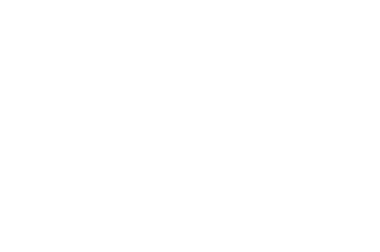

In [29]:
plt.axis("off")

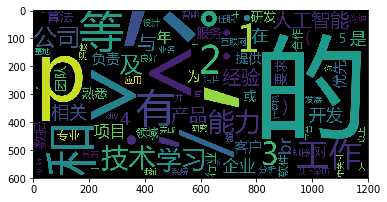

In [30]:
plt.imshow(wc)

In [31]:
wc.to_file("image.png")

In [32]:
w.close()

In [33]:
f.close()

In [34]:
cursor.close()

In [35]:
db.close()